<a href="https://colab.research.google.com/github/kyin99/NSAC-CyberScape/blob/master/intialcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
path = "/content/drive/My Drive/Colab Notebooks/trial_train.csv"
df_bonus=pd.read_csv(path)

In [6]:
df_bonus.describe()

,CAUSE_CODE,EVENT_VALIDITY_CODE,TS_INTENSITY,DAMAGE_AMOUNT_ORDER_TOTAL
count,2258.000000,2259.000000,1101.000000,1058.000000
mean,1.665633,2.717131,1.376985,2.184310
std,1.949581,1.281857,1.840800,1.059739
min,0.000000,0.000000,-4.140000,1.000000
25%,1.000000,2.000000,0.500000,1.000000
50%,1.000000,3.000000,1.500000,2.000000
75%,1.000000,4.000000,3.000000,3.000000
max,10.000000,4.000000,9.000000,4.000000


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

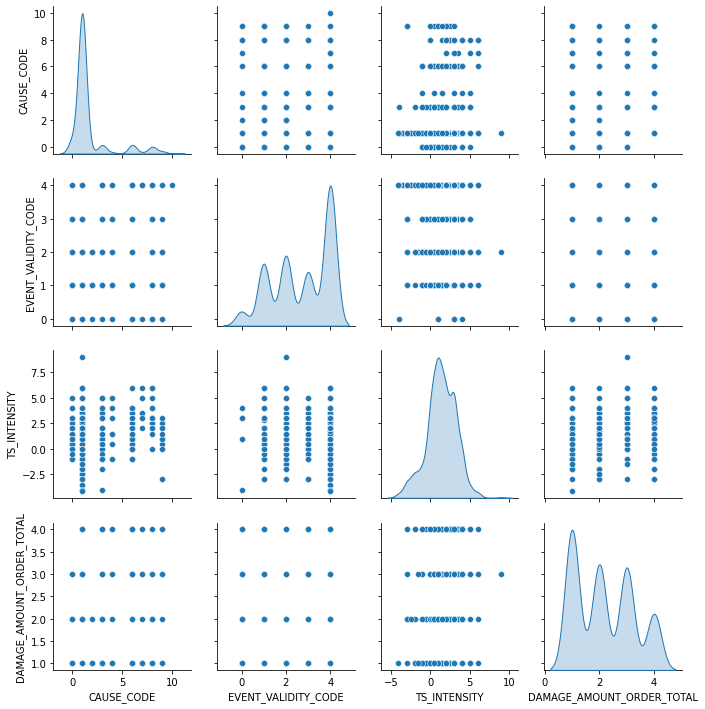

In [9]:
sns.pairplot(df_bonus[['CAUSE_CODE','EVENT_VALIDITY_CODE','TS_INTENSITY','DAMAGE_AMOUNT_ORDER_TOTAL']], diag_kind='kde')

In [10]:
df_bonus.head()

,CAUSE_CODE,EVENT_VALIDITY_CODE,TS_INTENSITY,DAMAGE_AMOUNT_ORDER_TOTAL
0,1.0,1,NaN,NaN
1,0.0,1,NaN,NaN
2,1.0,2,3.0,NaN
3,0.0,1,1.0,NaN
4,0.0,2,5.0,NaN


In [12]:
train_features = df_bonus.copy()
train_features

,CAUSE_CODE,EVENT_VALIDITY_CODE,TS_INTENSITY,DAMAGE_AMOUNT_ORDER_TOTAL
0,1.0,1,NaN,NaN
1,0.0,1,NaN,NaN
2,1.0,2,3.0,NaN
3,0.0,1,1.0,NaN
4,0.0,2,5.0,NaN
...,...,...,...,...
2254,1.0,4,NaN,NaN
2255,1.0,4,NaN,NaN
2256,1.0,1,NaN,3.0
2257,1.0,4,NaN,4.0


In [13]:
train_labels = train_features.pop('DAMAGE_AMOUNT_ORDER_TOTAL')

In [14]:
normalize = tf.keras.layers.experimental.preprocessing.Normalization()

In [15]:
normalize.adapt(np.array(train_labels))

In [16]:
print(normalize.mean.numpy())

[0.]


In [17]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalize(first).numpy())

First example: [[ 1.  1. nan]]

Normalized: [[inf inf nan]]


In [18]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [19]:
dnn_model = build_and_compile_model(normalize)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [20]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

ValueError: ignored

In [21]:
plot_loss(history)

NameError: ignored